# Step 1: Cleaning data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# NOTE: might consider the following methods when cleaning data:
# str.strip() to get rid of whitespace

# Name the dataframe cod, short for Cause Of Death
cod = pd.read_csv('/Users/christophercai/desktop/New_York_City_Leading_Causes_of_Death.csv', encoding = 'latin-1', error_bad_lines = False)

# see the dataset in its entirety
cod.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5
1,2011,Mental and Behavioral Disorders due to Acciden...,M,Not Stated/Unknown,5,.,.
2,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3
3,2008,Certain Conditions originating in the Perinata...,F,Other Race/ Ethnicity,.,.,.
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4


# Fig 1^

In [26]:
cod.shape

(1094, 7)

In [27]:
# Other Race/Ethnicity and Non Stated/Unknown category in the race column are mostly unpopulated or incomplete
other_race = cod.loc[cod['Race Ethnicity'].str.contains('Other Race/Ethnicity'),:]
other_race.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate


In [28]:
# check non stated/unknown
non_stated = cod.loc[cod['Race Ethnicity'].str.contains('Non Stated/Unknown'),:]
non_stated.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate


In [29]:
# do not index anything at this point

# rename column for clarity
cod = cod.rename(columns = {'Death Rate': 'Death Rate Per 100,000'})
cod.head()

# do value None or np.nan to replace '.' that indicate empty cells
cod = cod.replace(to_replace=['.'], value=[None])
cod.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,"Death Rate Per 100,000",Age Adjusted Death Rate
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5
1,2011,Mental and Behavioral Disorders due to Acciden...,M,Not Stated/Unknown,5,None,None
2,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3
3,2008,Certain Conditions originating in the Perinata...,F,Other Race/ Ethnicity,None,None,None
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4


In [30]:
cod.dtypes

Year                        int64
Leading Cause              object
Sex                        object
Race Ethnicity             object
Deaths                     object
Death Rate Per 100,000     object
Age Adjusted Death Rate    object
dtype: object

In [31]:
cod = cod.drop('Age Adjusted Death Rate', 1)

In [32]:
# convert appropriate columns to float types
cod['Deaths'] = cod['Deaths'].astype(float)  # can we just do this line without assigning it it to cod['Deaths']?
cod['Death Rate Per 100,000'] = cod['Death Rate Per 100,000'].astype(float)
cod.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,"Death Rate Per 100,000"
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299.0,35.1
1,2011,Mental and Behavioral Disorders due to Acciden...,M,Not Stated/Unknown,5.0,NaN
2,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840.0,215.7
3,2008,Certain Conditions originating in the Perinata...,F,Other Race/ Ethnicity,NaN,NaN
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64.0,5.1


In [33]:
cod.shape

(1094, 6)

In [34]:
# We should drop the 'Other Race / Ethnicity' 
# in the Race Ethnicity column because the category 
# doesn't provide us with much information / most of them are unpopulated
cod = cod.dropna(subset=['Death Rate Per 100,000'])
cod.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,"Death Rate Per 100,000"
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299.0,35.1
2,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840.0,215.7
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64.0,5.1
6,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152.0,17.8
7,2009,All Other Causes,M,Asian and Pacific Islander,220.0,43.1


# Categorization

## By Cause

Categorize by cause and then by race to see if there are any noticeable differences in each section

We want to observe what the highest cause of deaths for people in New York is and compare this to the rest of the country.

In [35]:
cod.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,"Death Rate Per 100,000"
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299.0,35.1
2,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840.0,215.7
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64.0,5.1
6,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152.0,17.8
7,2009,All Other Causes,M,Asian and Pacific Islander,220.0,43.1


In [36]:
causes = cod.groupby('Leading Cause').agg({'Deaths':np.sum, 'Death Rate Per 100,000':np.mean})
causes = causes.rename(columns={'Deaths':'Total Deaths','Death Rate Per 100,000':'Average Death Rate Per 100,000'})
causes = causes.sort_values(by='Average Death Rate Per 100,000', ascending=False)
causes

,Total Deaths,"Average Death Rate Per 100,000"
Leading Cause,,
"Diseases of Heart (I00-I09, I11, I13, I20-I51)",145354.0,199.351563
Malignant Neoplasms (Cancer: C00-C97),105051.0,149.796875
All Other Causes,76672.0,109.010937
"Assault (Homicide: Y87.1, X85-Y09)",2082.0,26.788889
Influenza (Flu) and Pneumonia (J09-J18),18433.0,25.889063
Diabetes Mellitus (E10-E14),13564.0,20.287500
Cerebrovascular Disease (Stroke: I60-I69),12808.0,18.843750
Human Immunodeficiency Virus Disease (HIV: B20-B24),5354.0,18.803448
Chronic Lower Respiratory Diseases (J40-J47),13082.0,18.320635


# Fig 2^

In [37]:
causes.shape

(20, 2)

Text(0.5,1,'Average Deaths Per 100,000 of People in New York City from 2007-2014')

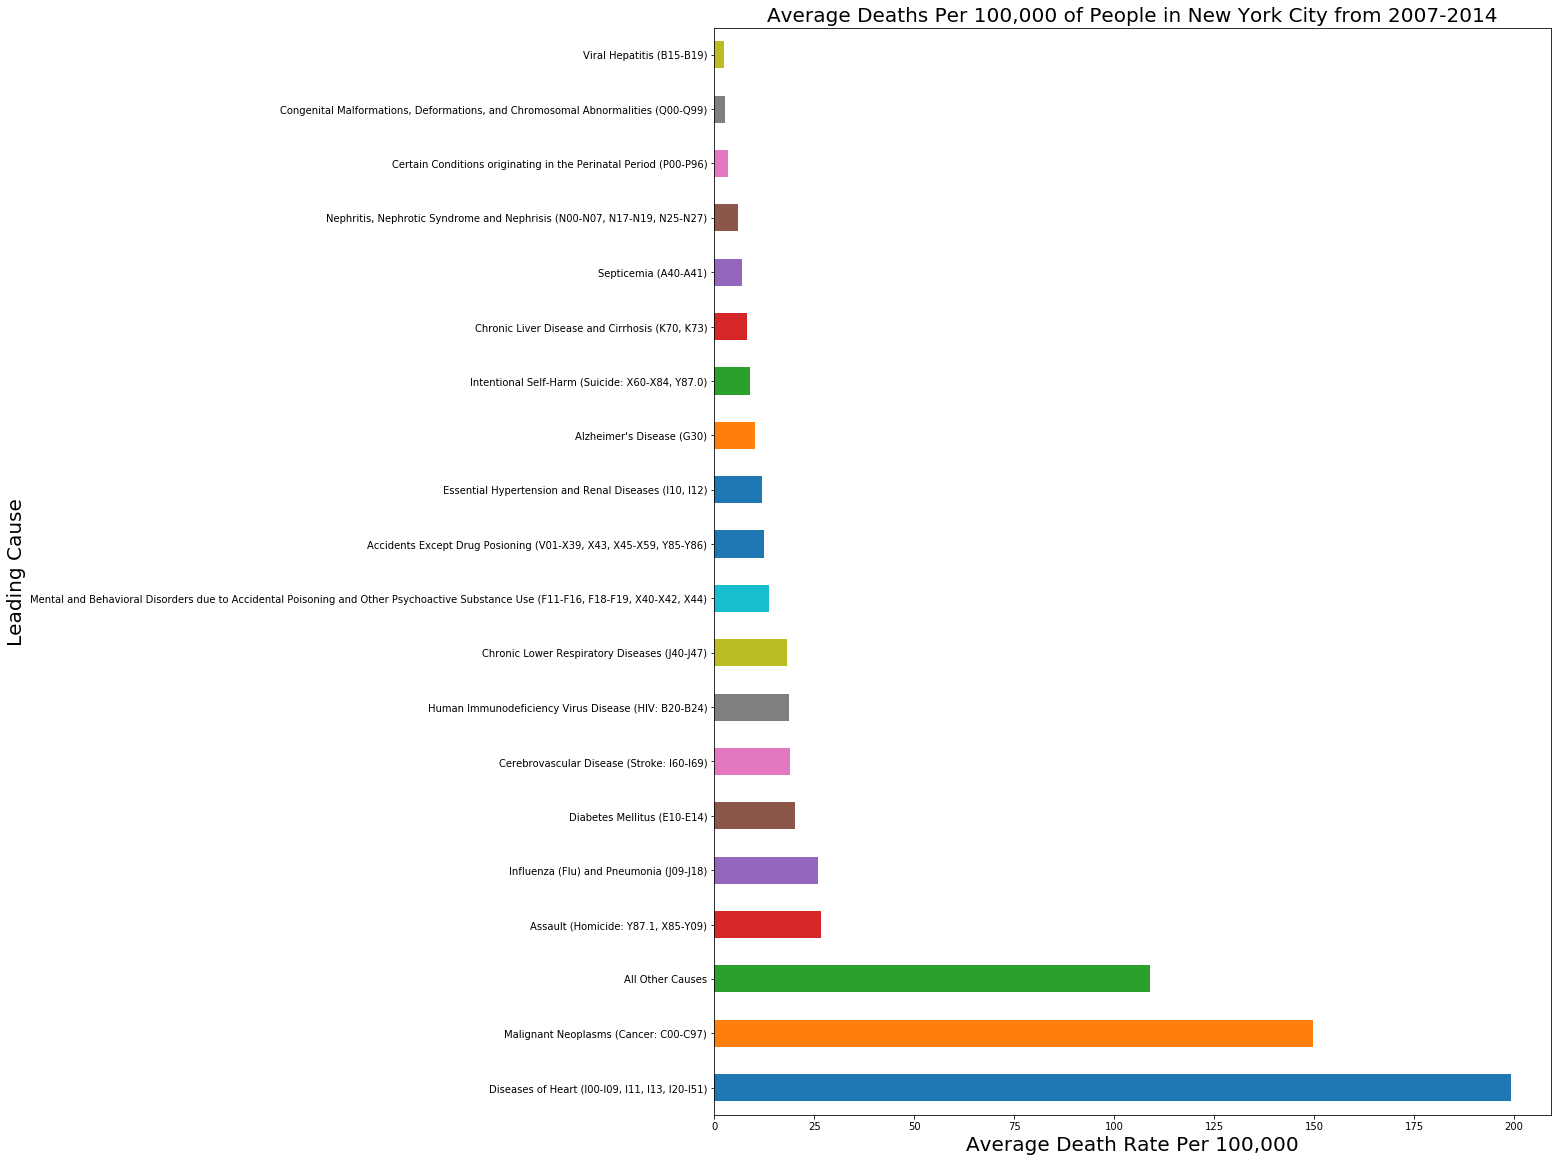

In [38]:
fig,ax = plt.subplots()
causes['Average Death Rate Per 100,000'].plot(kind='barh', figsize=[15,20])
ax.set_xlabel('Average Death Rate Per 100,000', fontsize=20)
ax.set_ylabel('Leading Cause', fontsize=20)
ax.set_title('Average Deaths Per 100,000 of People in New York City from 2007-2014', fontsize=20)

Comments:
- assault and HIV are surprising leading causes of deaths in NYC

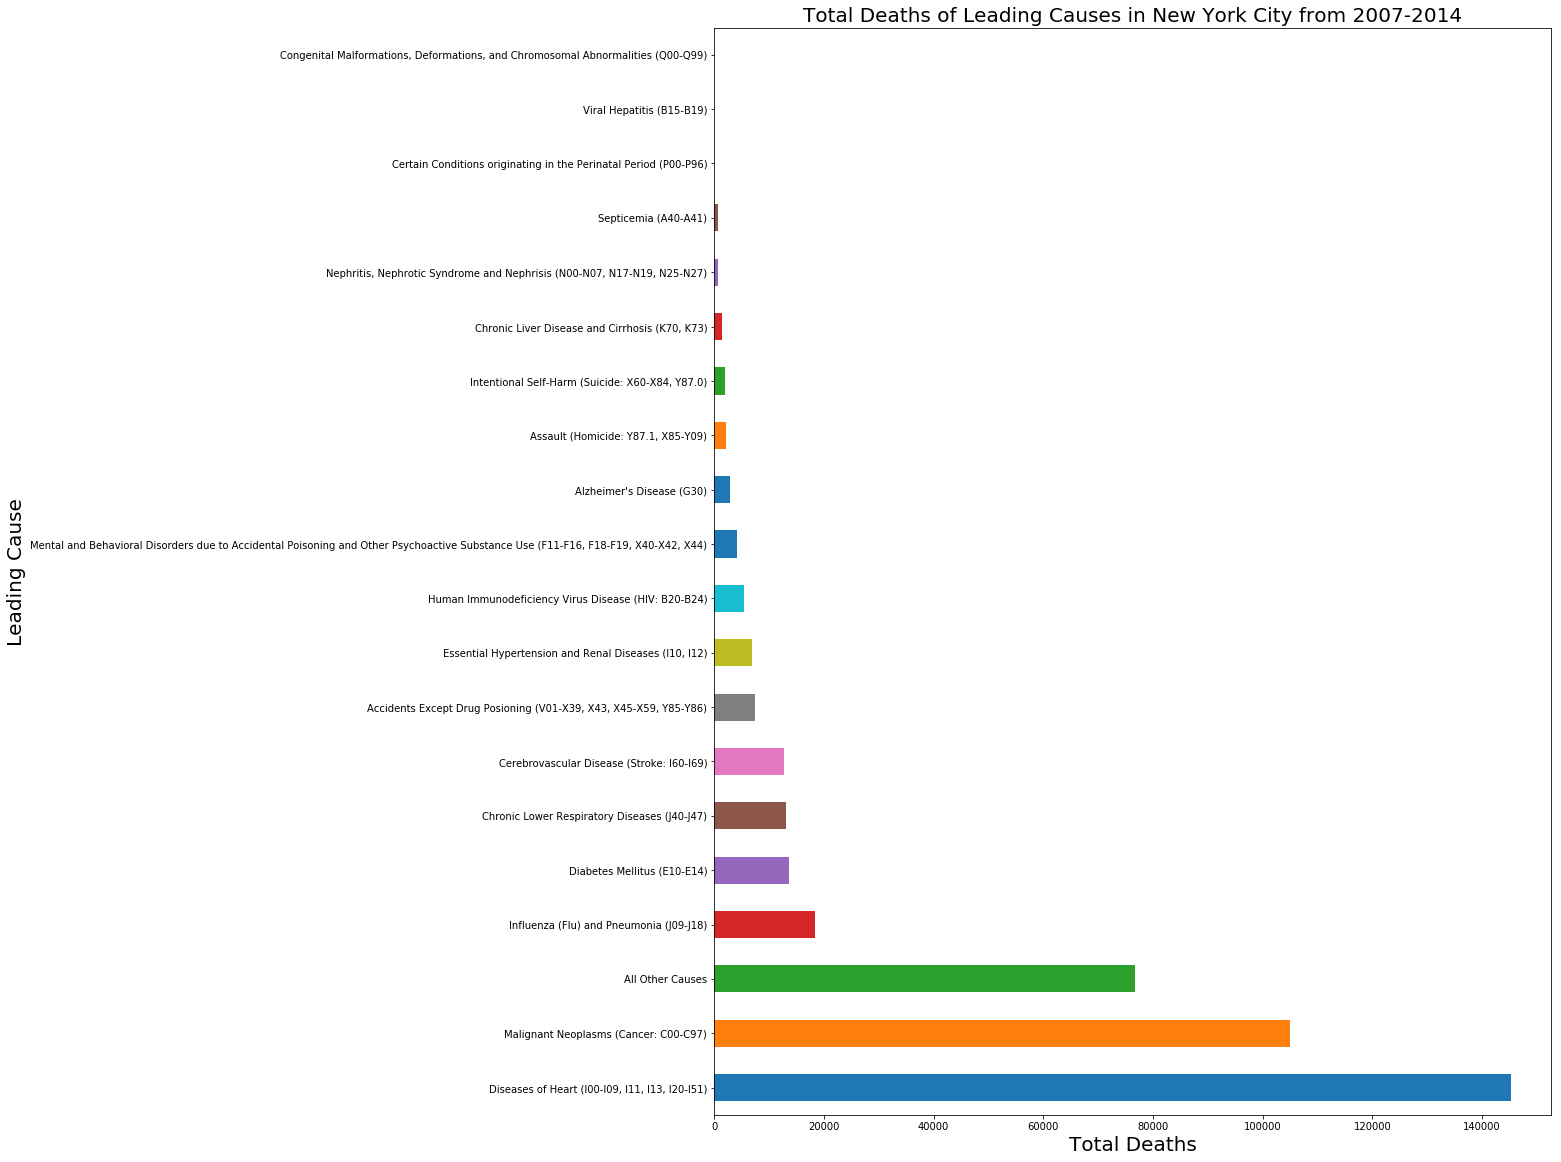

In [39]:
causes_totalDeaths = causes.sort_values(by='Total Deaths', ascending=False)
fig,ax = plt.subplots()
causes_totalDeaths['Total Deaths'].plot(kind='barh', figsize=[15,20])
ax.set_xlabel('Total Deaths', fontsize=20)
ax.set_ylabel('Leading Cause', fontsize=20)
ax.set_title('Total Deaths of Leading Causes in New York City from 2007-2014', fontsize=20)

plt.show()

## Categorize by Race / Ethnicity

To help us examine each race ethnicity, we'll create a dataframe for each.

In [40]:
# see what races are contained within the dataframe
cod['Race Ethnicity'].unique()

array(['Black Non-Hispanic', 'Hispanic', 'Asian and Pacific Islander',
       'White Non-Hispanic'], dtype=object)

Asian and Pacific Islander:

In [41]:
codA = cod.loc[cod['Race Ethnicity'].str.contains('Asian and Pacific Islander'),:]
codA.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,"Death Rate Per 100,000"
7,2009,All Other Causes,M,Asian and Pacific Islander,220.0,43.1
8,2013,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Asian and Pacific Islander,437.0,72.8
23,2007,Chronic Lower Respiratory Diseases (J40-J47),M,Asian and Pacific Islander,43.0,8.9
29,2009,"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",M,Asian and Pacific Islander,35.0,6.9
31,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Asian and Pacific Islander,456.0,85.6


In [42]:
codA.shape

(177, 6)

In [43]:
# groupby method to create new dataframe displaying new columns below
# round all to 2 dp
codA = codA.groupby('Leading Cause').agg({'Deaths':np.sum, 'Death Rate Per 100,000':np.mean})
codA = codA.rename(columns={'Death Rate Per 100,000':'Average Death Rate Per 100,000','Deaths':'Total Deaths'})
codA = codA.sort_values(by='Average Death Rate Per 100,000', ascending=False)
codA

,Total Deaths,"Average Death Rate Per 100,000"
Leading Cause,,
Malignant Neoplasms (Cancer: C00-C97),7927.0,90.968750
"Diseases of Heart (I00-I09, I11, I13, I20-I51)",7509.0,86.456250
All Other Causes,4597.0,52.312500
Influenza (Flu) and Pneumonia (J09-J18),1328.0,15.237500
Cerebrovascular Disease (Stroke: I60-I69),1233.0,13.987500
Diabetes Mellitus (E10-E14),919.0,10.512500
"Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)",747.0,8.618750
Chronic Lower Respiratory Diseases (J40-J47),745.0,8.587500
"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",491.0,6.066667


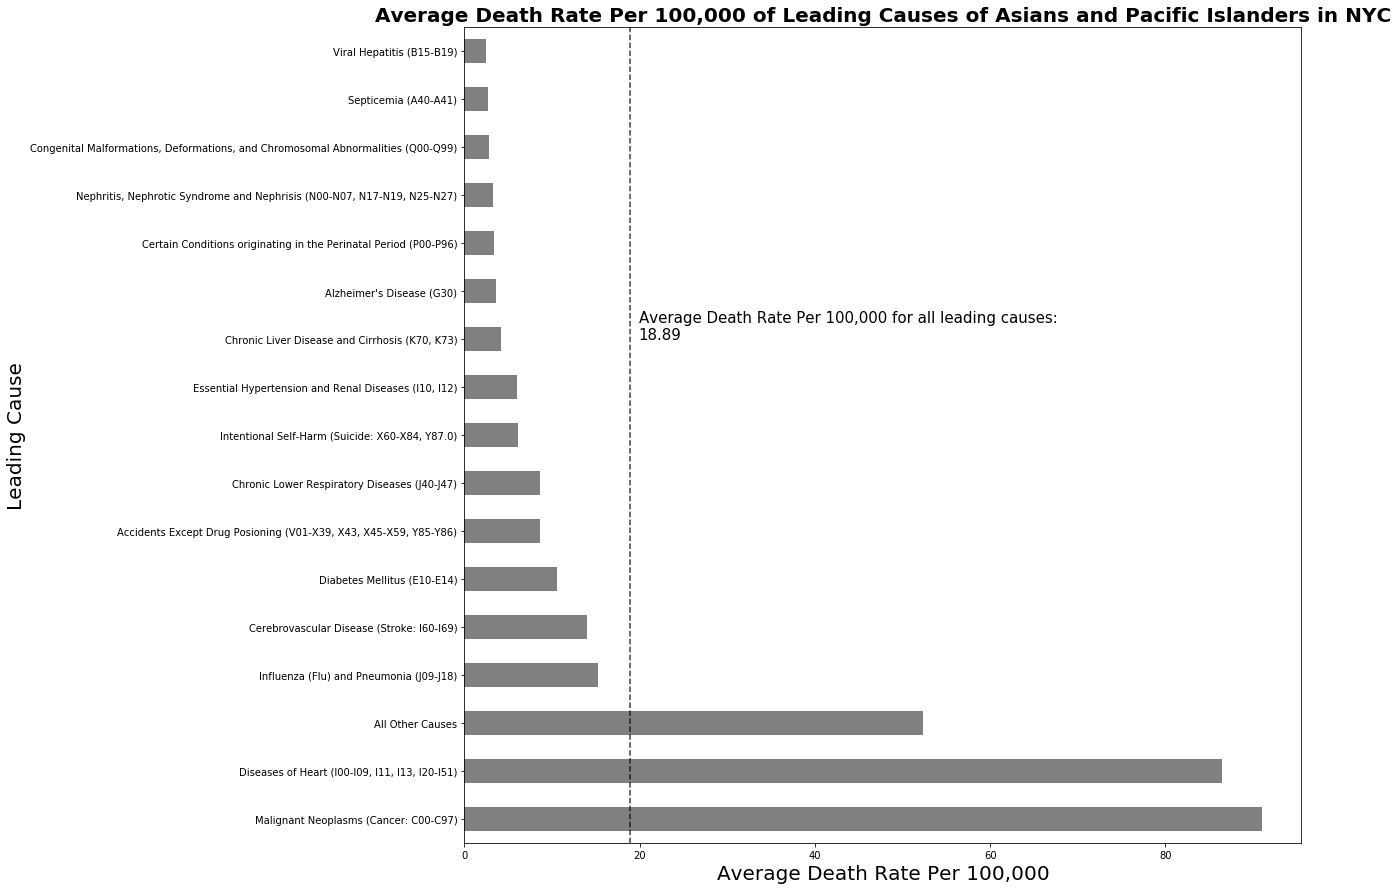

In [44]:
fig,ax = plt.subplots()
codA['Average Death Rate Per 100,000'].plot(kind='barh', figsize=[15,15], color='grey')
ax.set_xlabel('Average Death Rate Per 100,000', fontsize=20)
ax.set_ylabel('Leading Cause', fontsize=20)
ax.set_title('Average Death Rate Per 100,000 of Leading Causes of Asians and Pacific Islanders in NYC', fontsize=20, fontweight='bold')

avg_deathrate = codA['Average Death Rate Per 100,000'].mean()
line_label = "Average Death Rate Per 100,000 for all leading causes:\n" + str(round(avg_deathrate,2))

ax.vlines(avg_deathrate,-1,20,linestyle="--",color="black",alpha=0.75)

ax.text(avg_deathrate + 1,
        10,
        line_label,
        horizontalalignment='left', fontsize=15)

plt.show()

## Fig 3^

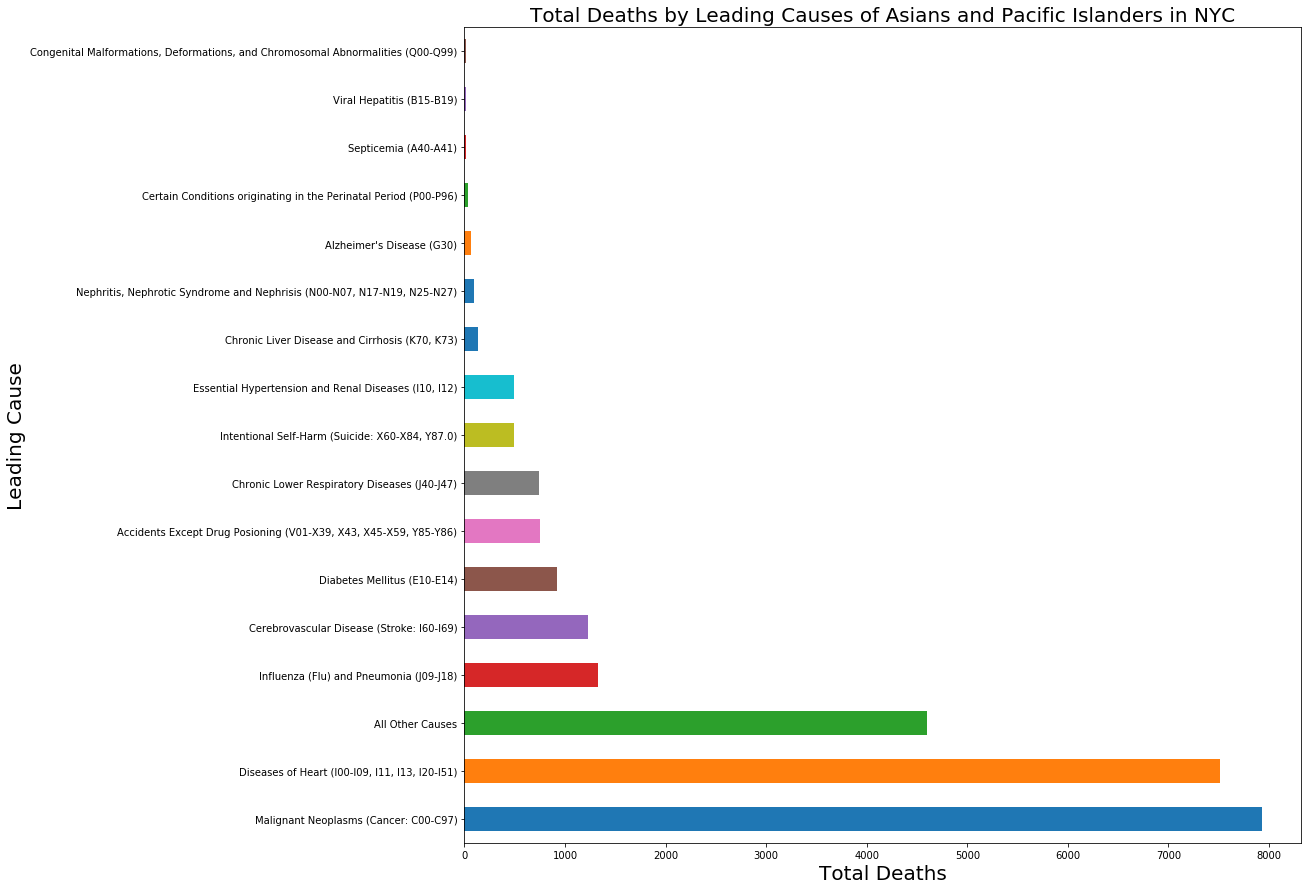

In [45]:
fig,ax = plt.subplots()
codA_totalDeaths = codA.sort_values(by='Total Deaths', ascending=False)
codA_totalDeaths['Total Deaths'].plot(kind='barh', figsize=[15,15])
ax.set_xlabel('Total Deaths', fontsize=20)
ax.set_ylabel('Leading Cause', fontsize=20)
ax.set_title('Total Deaths by Leading Causes of Asians and Pacific Islanders in NYC', fontsize=20)

plt.show()

## Black Non-Hispanic

In [46]:
codB = cod.loc[cod['Race Ethnicity'].str.contains('Black Non-Hispanic'),:]
codB.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,"Death Rate Per 100,000"
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299.0,35.1
2,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840.0,215.7
6,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152.0,17.8
21,2010,Malignant Neoplasms (Cancer: C00-C97),F,Black Non-Hispanic,1768.0,168.6
24,2011,Malignant Neoplasms (Cancer: C00-C97),F,Black Non-Hispanic,1918.0,183.2


In [47]:
codB.shape

(178, 6)

In [48]:
# groupby method to create new dataframe displaying new columns below
codB = codB.groupby('Leading Cause').agg({'Deaths':np.sum, 'Death Rate Per 100,000':np.mean})
codB = codB.rename(columns={'Death Rate Per 100,000':'Average Death Rate Per 100,000','Deaths':'Total Deaths'})
codB = codB.sort_values(by='Average Death Rate Per 100,000', ascending=False)
codB

,Total Deaths,"Average Death Rate Per 100,000"
Leading Cause,,
"Diseases of Heart (I00-I09, I11, I13, I20-I51)",35222.0,231.631250
Malignant Neoplasms (Cancer: C00-C97),26886.0,177.112500
All Other Causes,21406.0,141.531250
Diabetes Mellitus (E10-E14),5441.0,35.587500
"Assault (Homicide: Y87.1, X85-Y09)",1968.0,28.825000
Influenza (Flu) and Pneumonia (J09-J18),4148.0,27.250000
Human Immunodeficiency Virus Disease (HIV: B20-B24),3583.0,24.450000
Cerebrovascular Disease (Stroke: I60-I69),3649.0,23.793750
Chronic Lower Respiratory Diseases (J40-J47),3060.0,20.150000


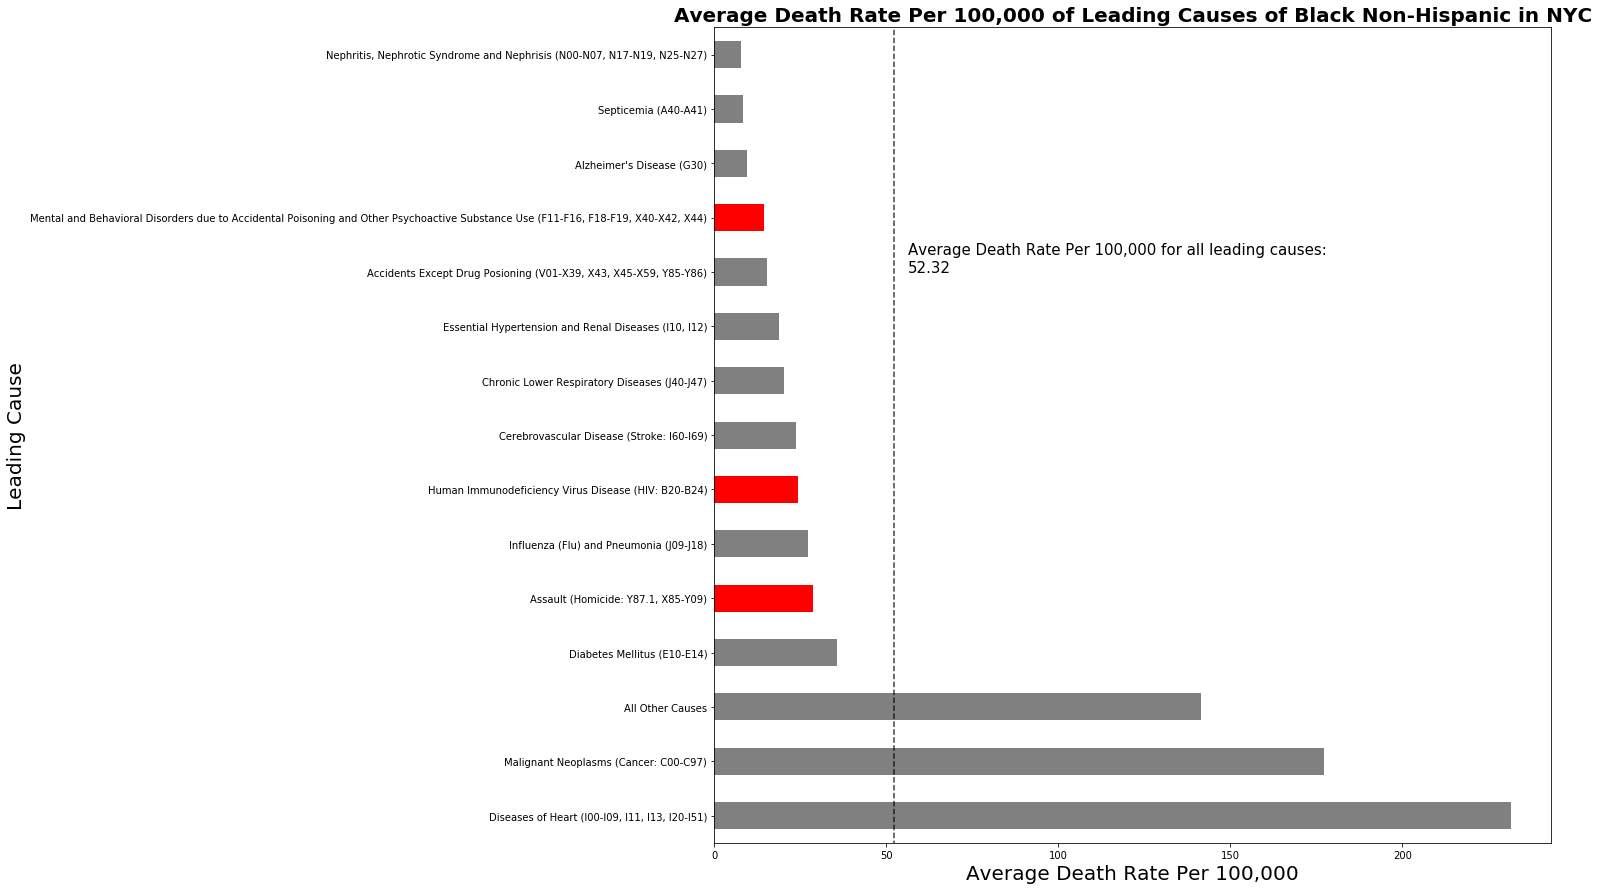

In [49]:
fig,ax = plt.subplots()
codB['Average Death Rate Per 100,000'].plot(kind='barh', figsize=[15,15], color='grey')
ax.set_xlabel('Average Death Rate Per 100,000', fontsize=20)
ax.set_ylabel('Leading Cause', fontsize=20)
ax.set_title('Average Death Rate Per 100,000 of Leading Causes of Black Non-Hispanic in NYC', fontsize=20, fontweight='bold')

# draw the average death rate across all leading causes

avg_deathrate = codB['Average Death Rate Per 100,000'].mean()
message = "Average Death Rate Per 100,000 for all leading causes:\n" + str(round(avg_deathrate,2))

ax.vlines(avg_deathrate,-1,15,linestyle="--",color="black",alpha=0.75)

ax.text(avg_deathrate + 4,
        10,
        message,
        horizontalalignment='left', fontsize=15)

# highlight specific bars
highlight = 'Assault (Homicide: Y87.1, X85-Y09)'
highlight2 = 'Human Immunodeficiency Virus Disease (HIV: B20-B24)'
highlight3 = 'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)'

pos = codB.index.get_loc(highlight)
pos2 = codB.index.get_loc(highlight2)
pos3 = codB.index.get_loc(highlight3)

ax.patches[pos].set_facecolor('red')
ax.patches[pos2].set_facecolor('red')
ax.patches[pos3].set_facecolor('red')
ax.legend


plt.show()

# Fig 4^

Text(0.5,1,'Total Deaths by Leading Causes of Black/Non-Hispanic in NYC')

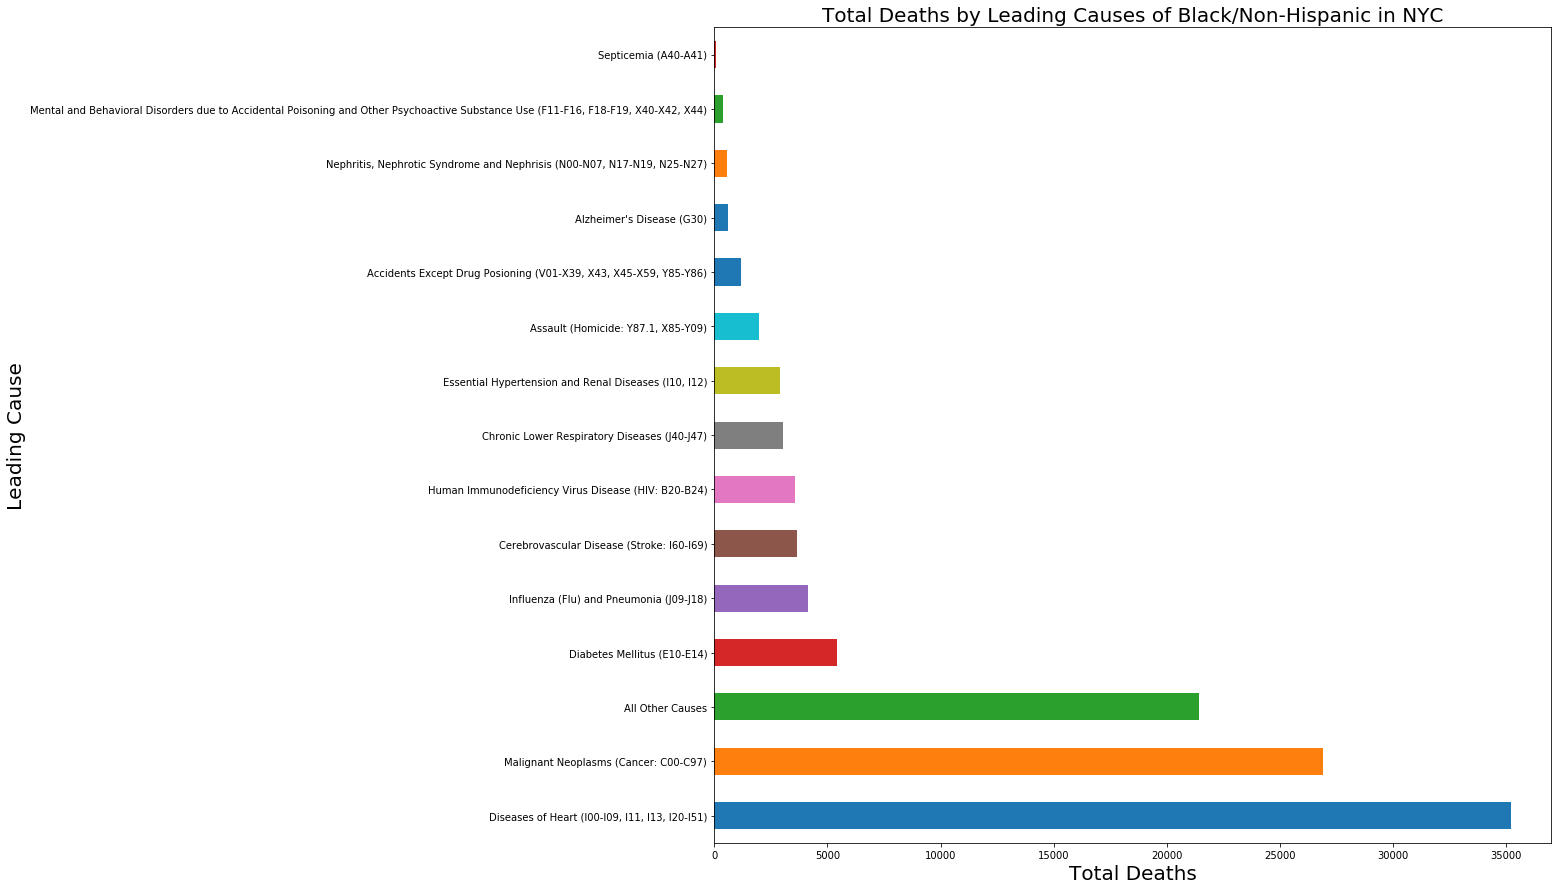

In [50]:
fig,ax = plt.subplots()
codB_totalDeaths = codB.sort_values(by='Total Deaths', ascending=False)
codB_totalDeaths['Total Deaths'].plot(kind='barh', figsize=[15,15])
ax.set_xlabel('Total Deaths', fontsize=20)
ax.set_ylabel('Leading Cause', fontsize=20)
ax.set_title('Total Deaths by Leading Causes of Black/Non-Hispanic in NYC', fontsize=20)

# White Non-Hispanic

In [51]:
codW = cod.loc[cod['Race Ethnicity'].str.contains('White Non-Hispanic'),:]
codW.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,"Death Rate Per 100,000"
12,2012,Essential Hypertension and Renal Diseases (I10...,F,White Non-Hispanic,199.0,14.0
16,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,White Non-Hispanic,4220.0,316.4
22,2009,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3236.0,240.5
32,2011,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3222.0,241.6
39,2012,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,4719.0,332.7


In [52]:
codW = codW.groupby('Leading Cause').agg({'Deaths':np.sum, 'Death Rate Per 100,000':np.mean})
codW = codW.rename(columns={'Deaths':'Total Deaths', 'Death Rate Per 100,000':'Average Death Rate Per 100,000'})
codW = codW.sort_values(by='Average Death Rate Per 100,000', ascending=False)
codW

,Total Deaths,"Average Death Rate Per 100,000"
Leading Cause,,
"Diseases of Heart (I00-I09, I11, I13, I20-I51)",81560.0,367.593750
Malignant Neoplasms (Cancer: C00-C97),52676.0,238.075000
All Other Causes,33746.0,152.525000
Influenza (Flu) and Pneumonia (J09-J18),9607.0,43.350000
Chronic Lower Respiratory Diseases (J40-J47),7085.0,31.906250
Cerebrovascular Disease (Stroke: I60-I69),5366.0,24.106250
Diabetes Mellitus (E10-E14),4012.0,18.162500
"Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)",3598.0,16.381250
"Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)",2295.0,15.436364


In [53]:
codW.shape

(14, 2)

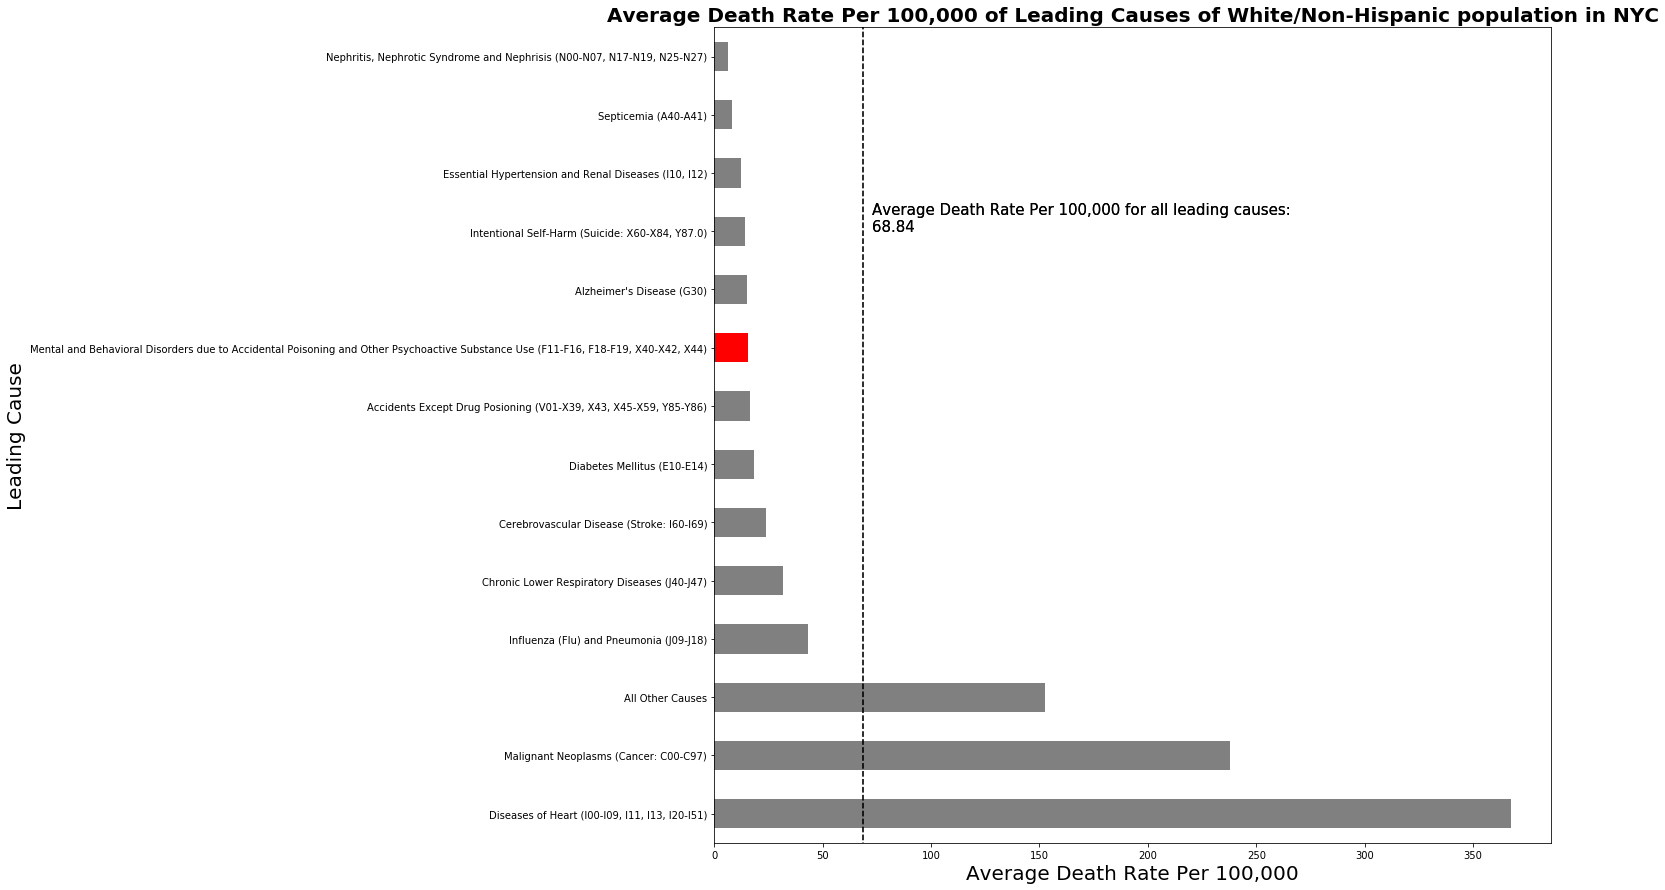

In [54]:
# plot average death rate per 100,000
fig,ax = plt.subplots()
codW['Average Death Rate Per 100,000'].plot(kind='barh', figsize=[15,15], color='grey')
ax.set_xlabel('Average Death Rate Per 100,000', fontsize=20)
ax.set_ylabel('Leading Cause', fontsize=20)
ax.set_title('Average Death Rate Per 100,000 of Leading Causes of White/Non-Hispanic population in NYC', fontsize=20, fontweight='bold')

# draw the average death rate across all leading causes

avg_deathrate = codW['Average Death Rate Per 100,000'].mean()
message = "Average Death Rate Per 100,000 for all leading causes:\n" + str(round(avg_deathrate,2))

ax.vlines(avg_deathrate,-1,15,linestyle="--",color="black",alpha=0.75)

ax.text(avg_deathrate + 4,
        10,
        message,
        horizontalalignment='left', fontsize=15)

ax.vlines(avg_deathrate,-1,15,linestyle="--",color="black",alpha=0.75)

ax.text(avg_deathrate + 4,
        10,
        message,
        horizontalalignment='left', fontsize=15)

# highlight specific bars

highlight = 'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)'

pos = codW.index.get_loc(highlight)

ax.patches[pos].set_facecolor('red')
ax.legend


plt.show()

# Fig 5^

Text(0.5,1,'Total Deaths by Leading Causes of White/Non-Hispanic in NYC')

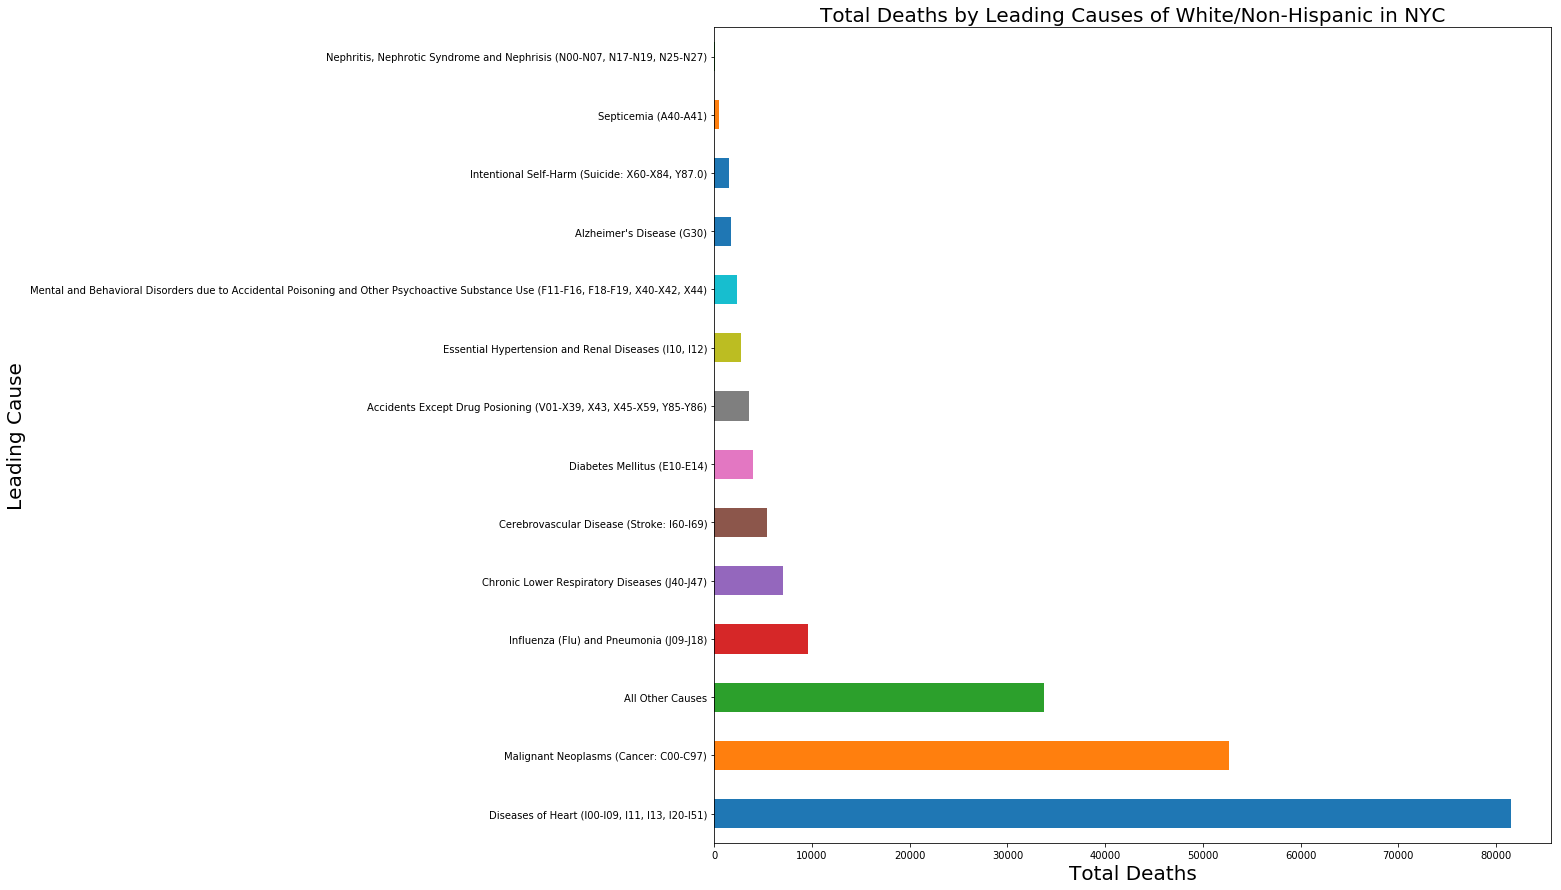

In [55]:
fig,ax = plt.subplots()
codW_totalDeaths = codW.sort_values(by='Total Deaths', ascending=False)
codW_totalDeaths['Total Deaths'].plot(kind='barh', figsize=[15,15])
ax.set_xlabel('Total Deaths', fontsize=20)
ax.set_ylabel('Leading Cause', fontsize=20)
ax.set_title('Total Deaths by Leading Causes of White/Non-Hispanic in NYC', fontsize=20)

## Hispanic

In [56]:
codH = cod.loc[cod['Race Ethnicity'].str.contains('Hispanic'),:]
codH.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,"Death Rate Per 100,000"
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299.0,35.1
2,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840.0,215.7
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64.0,5.1
6,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152.0,17.8
12,2012,Essential Hypertension and Renal Diseases (I10...,F,White Non-Hispanic,199.0,14.0


In [57]:
# White Non-Hispanic and Black Non-Hispanic included, drop rows containing them
codH = codH[~codH['Race Ethnicity'].str.contains("Black")]
codH = codH[~codH['Race Ethnicity'].str.contains("White")]

In [58]:
codH = codH.groupby('Leading Cause').agg({'Deaths':np.sum, 'Death Rate Per 100,000':np.mean})
codH = codH.rename(columns={'Deaths':'Total Deaths', 'Death Rate Per 100,000':'Average Death Rate Per 100,000'})
codH = codH.sort_values(by='Average Death Rate Per 100,000', ascending=False)
codH

,Total Deaths,"Average Death Rate Per 100,000"
Leading Cause,,
"Diseases of Heart (I00-I09, I11, I13, I20-I51)",21063.0,111.725000
Malignant Neoplasms (Cancer: C00-C97),17562.0,93.031250
All Other Causes,16923.0,89.675000
Influenza (Flu) and Pneumonia (J09-J18),3350.0,17.718750
Diabetes Mellitus (E10-E14),3192.0,16.887500
Cerebrovascular Disease (Stroke: I60-I69),2560.0,13.487500
Chronic Lower Respiratory Diseases (J40-J47),2192.0,12.260000
"Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)",1511.0,11.918182
Human Immunodeficiency Virus Disease (HIV: B20-B24),1771.0,11.853846


In [59]:
codH.shape

(15, 2)

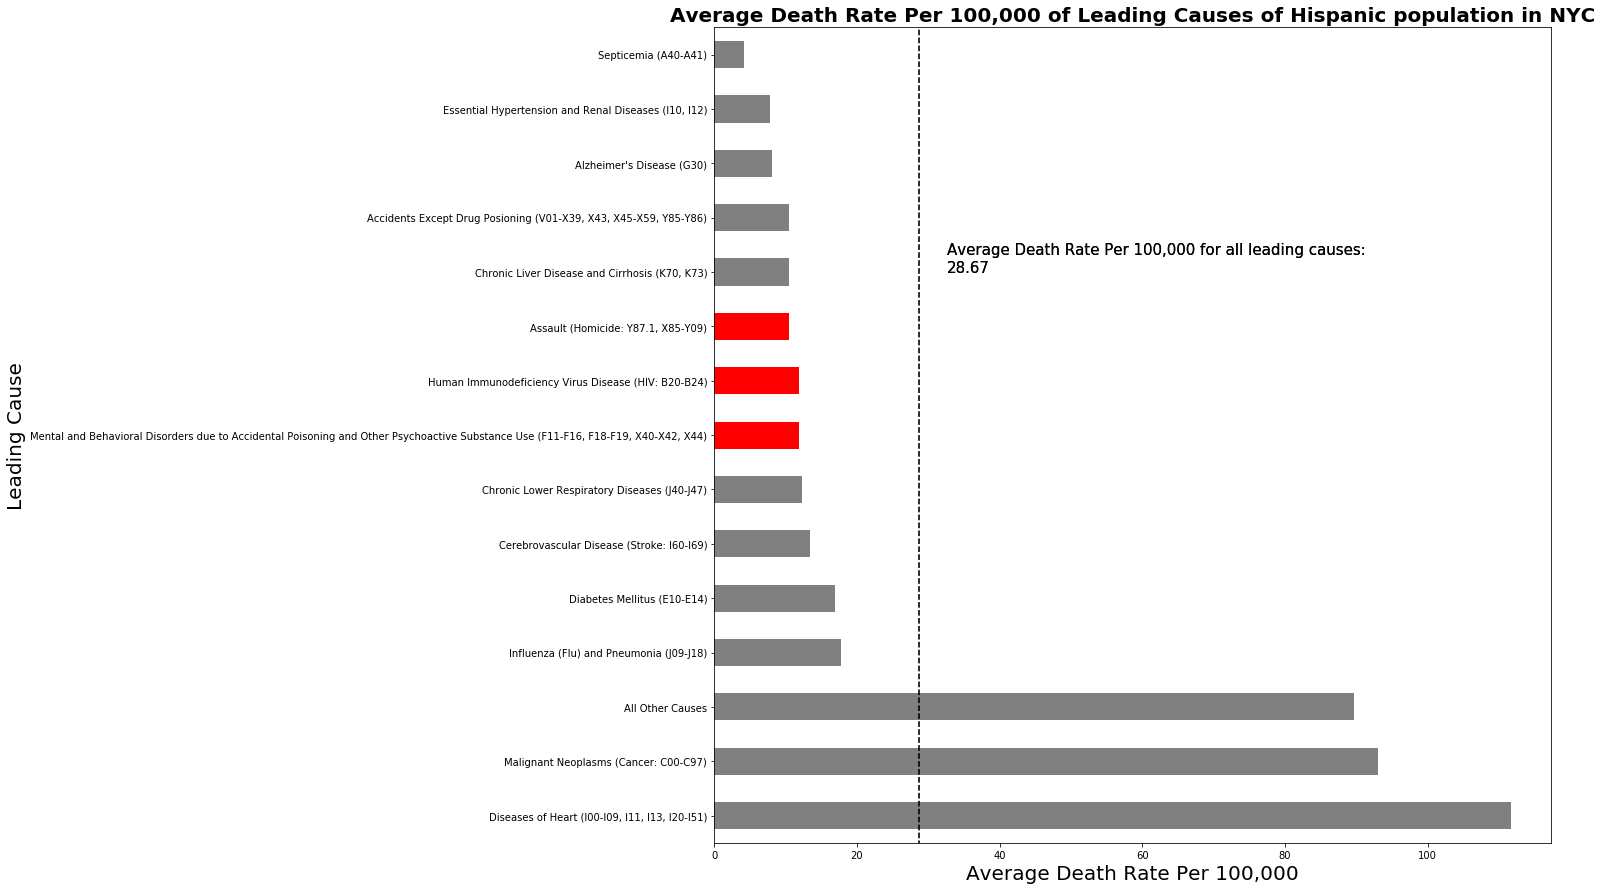

In [60]:
# plot average death rate per 100,000
fig,ax = plt.subplots()
codH['Average Death Rate Per 100,000'].plot(kind='barh', figsize=[15,15], color='grey')
ax.set_xlabel('Average Death Rate Per 100,000', fontsize=20)
ax.set_ylabel('Leading Cause', fontsize=20)
ax.set_title('Average Death Rate Per 100,000 of Leading Causes of Hispanic population in NYC', fontsize=20, fontweight='bold')

# draw the average death rate across all leading causes

avg_deathrate = codH['Average Death Rate Per 100,000'].mean()
message = "Average Death Rate Per 100,000 for all leading causes:\n" + str(round(avg_deathrate,2))

ax.vlines(avg_deathrate,-1,20,linestyle="--",color="black",alpha=0.75)

ax.text(avg_deathrate + 4,
        10,
        message,
        horizontalalignment='left', fontsize=15)

ax.vlines(avg_deathrate,-1,15,linestyle="--",color="black",alpha=0.75)

ax.text(avg_deathrate + 4,
        10,
        message,
        horizontalalignment='left', fontsize=15)

# highlight specific bars
highlight = 'Assault (Homicide: Y87.1, X85-Y09)'
highlight2 = 'Human Immunodeficiency Virus Disease (HIV: B20-B24)'
highlight3 = 'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)'

pos = codH.index.get_loc(highlight)
pos2 = codH.index.get_loc(highlight2)
pos3 = codH.index.get_loc(highlight3)

ax.patches[pos].set_facecolor('red')
ax.patches[pos2].set_facecolor('red')
ax.patches[pos3].set_facecolor('red')
ax.legend


plt.show()

# Fig 6^

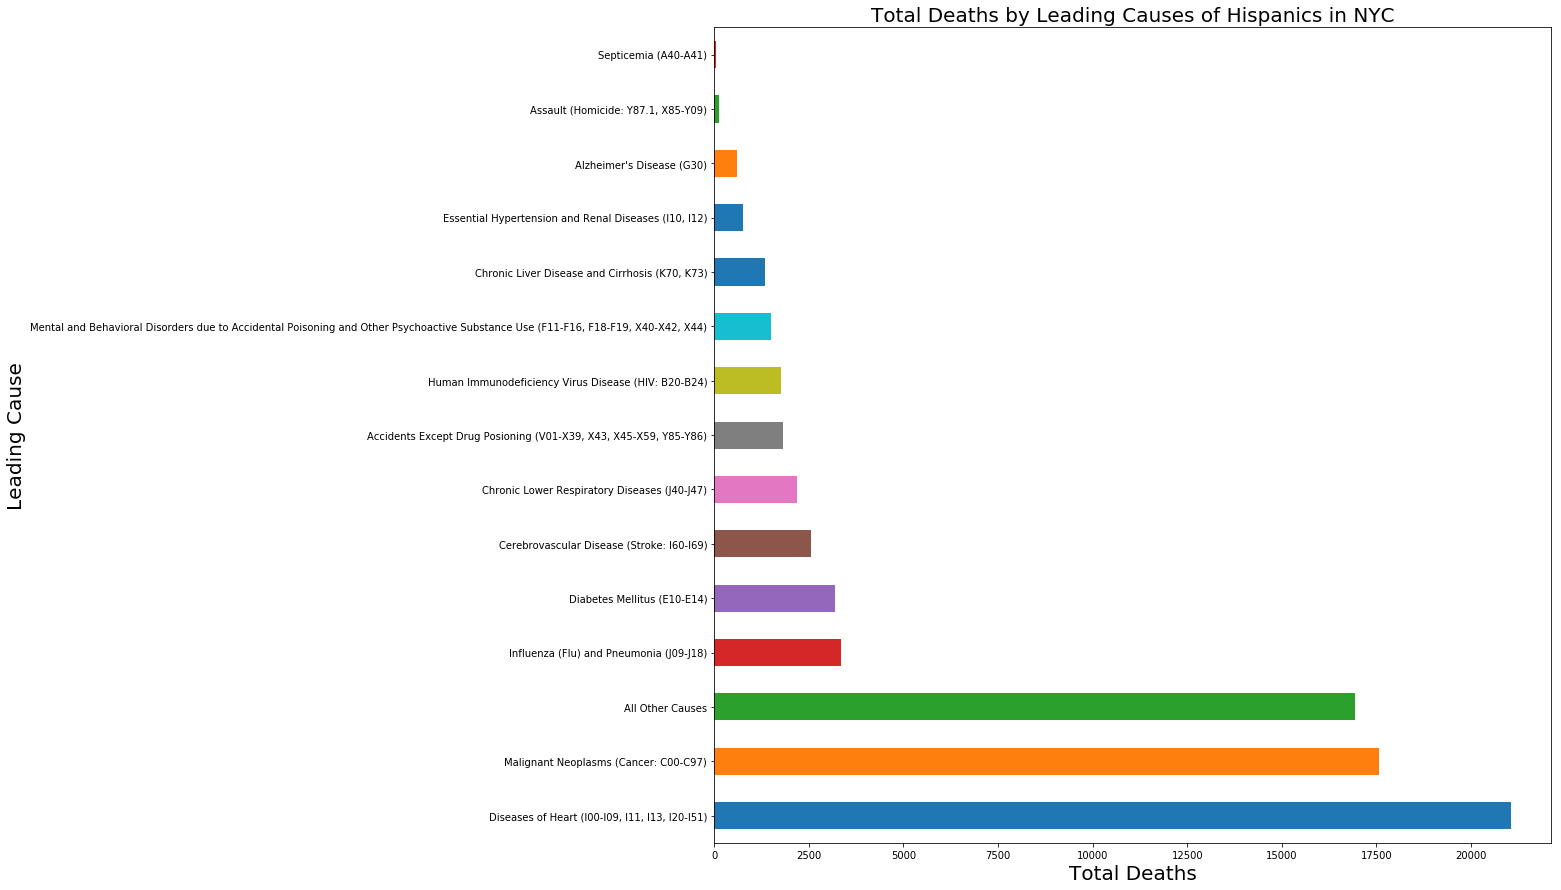

In [61]:
fig,ax = plt.subplots()
codH_totalDeaths = codH.sort_values(by='Total Deaths', ascending=False)
codH_totalDeaths['Total Deaths'].plot(kind='barh', figsize=[15,15])
ax.set_xlabel('Total Deaths', fontsize=20)
ax.set_ylabel('Leading Cause', fontsize=20)
ax.set_title('Total Deaths by Leading Causes of Hispanics in NYC', fontsize=20)

plt.show()

# Side-by-side comparison (MOVE TO TRIAL SECTION)

NameError: name 'n1' is not defined

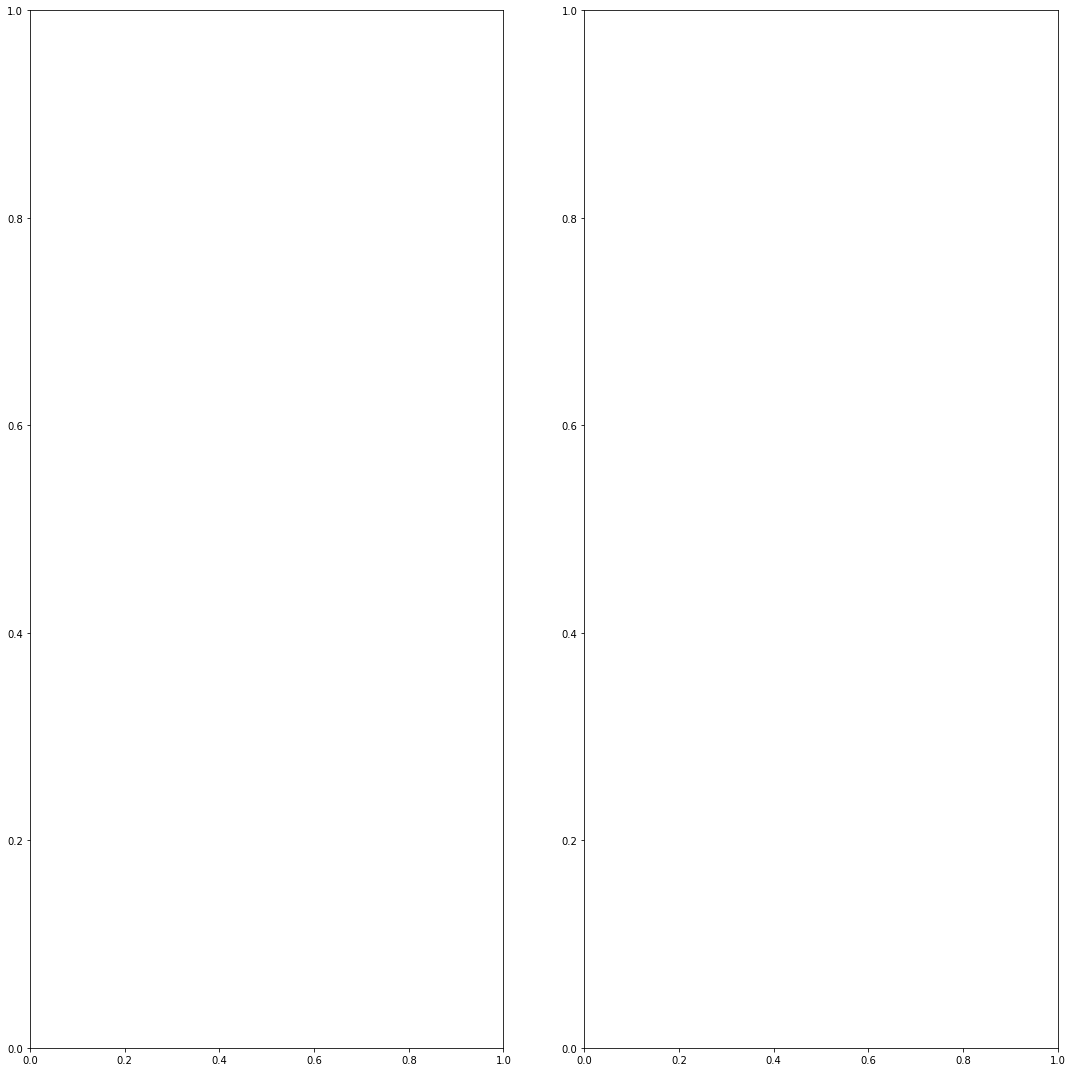

In [62]:
fig, ax = plt.subplots(1,2, figsize = (15,15))

fig.tight_layout(w_pad=5) 

# b, d
ax[0].scatter(n1['Wins'], n1['BatAverage'], s=0.00025*n1.attendance, alpha = 0.5)
ax[0].set_xlabel('Wins')
ax[1].set_ylabel('Batting Average')

# c, d
ax[1].scatter(n1['Wins'], n1['HRAverage'], s=0.00025*n1.attendance, alpha = 0.5)
ax[1].set_xlabel('Wins')
ax[1].set_ylabel('Home Run Average')

ax[0].set_ylim(0.22,0.28)
ax[1].set_ylim(0.01,0.04)

plt.show()

In [ ]:
fig, ax = plt.subplots(1,2, figsize = )

In [ ]:
cod['Year'].unique()

## Read in national dataset (MOVE TO TRIAL SECTION)

In [ ]:
cod_national = pd.read_csv('/Users/daneesh/desktop/NCHS_-_Leading_Causes_of_Death__United_States.csv', encoding = 'latin-1', error_bad_lines = False)

In [ ]:
cod_national.head()

In [ ]:
cod_national.dtypes

In [ ]:
cod_national['Year'] = cod_national['Year'].astype(str)

In [ ]:
cod_national.dtypes

In [ ]:
cod_national = cod_national.loc[cod_national['Year'].str.contains('2007', '2008', '2009', '2010'),:]

In [ ]:
cod_national

In [ ]:
cod_national = cod_national.drop('Cause Name', axis=1)
cod_national = cod_national.rename(columns={'113 Cause Name':'Leading Cause'})
cod_national.head()

In [ ]:
cod_national = cod_national.dropna(subset=['Age-adjusted Death Rate'])

In [ ]:
cod_national['Leading Cause'].unique()

In [ ]:
cod_national['State'].unique()

In [ ]:
# group by national data
cod_us = cod_national.loc[cod_national['State'].str.contains('United States'),:]

In [ ]:
# group by diseases of national data
cod_us = cod_us.groupby('Leading Cause').agg({'Deaths':np.sum, 'Age-adjusted Death Rate':np.mean})
cod_us = cod_us.rename(columns={'Deaths':'Total Deaths'})
cod_us.head()

## how to make x and y labels on axis larger

In [ ]:
cod_heartdisease  = cod_national.loc[cod_national['Leading Cause'].str.contains('Diseases of heart'),:]
cod_heartdisease

In [ ]:
causes_national = cod_national.groupby('Leading Cause').agg({'Deaths':np.sum, 'Age-adjusted Death Rate':np.mean})

In [ ]:
cod_heartdisease = cod_national.loc[cod_national['Leading Cause'].str.contains('Diseases of heart'),:]
cod_heartdisease.head()

In [ ]:
cod_heartdisease = cod_heartdisease.groupby('State').agg({'Deaths':np.sum, 'Age-adjusted Death Rate':np.mean})
cod_heartdisease = cod_heartdisease.sort_values(by='Deaths', ascending=False)
cod_heartdisease

# inconclusive, more deaths could be due to more people living in the state

# By Gender

In [ ]:
cod.head()

In [ ]:
cod_female = cod[~cod['Sex'].str.contains("M")]
cod_female.head()

In [ ]:
cod_female = cod_female.groupby('Leading Cause').agg({'Deaths':np.sum,'Death Rate Per 100,000':np.mean})

In [ ]:
cod_female.shape

In [ ]:
cod_female = cod_female.rename(columns={'Deaths':'Total Deaths', 'Death Rate Per 100,000':'Average Death Rate Per 100,000'})

In [ ]:
cod_female = cod_female.sort_values(by='Average Death Rate Per 100,000', ascending=True)
cod_female

In [ ]:
cod_male = cod[~cod['Sex'].str.contains("F")]
cod_male.head()

In [ ]:
cod_male.shape

In [ ]:
cod_male = cod_male.groupby('Leading Cause').agg({'Deaths':np.sum,'Death Rate Per 100,000':np.mean})

In [ ]:
cod_male = cod_male.rename(columns={'Deaths':'Total Deaths', 'Death Rate Per 100,000':'Average Death Rate Per 100,000'})

In [ ]:
cod_male = cod_male.sort_values(by='Average Death Rate Per 100,000', ascending=True)
cod_male

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (30, 20))

fig.tight_layout(w_pad=5)

ax[0].bar(cod_female.index, cod_female['Average Death Rate Per 100,000'], color='grey')
ax[0].set_ylabel('Total Deaths', fontsize=20)
ax[0].set_xlabel('Leading Cause', fontsize=20)
ax[0].set_title('Average Death Rate Per 100,000 for Female Population in NYC', fontsize=20, fontweight='bold')

ax[0].tick_params(axis='x', rotation=90)


ax[1].bar(cod_male.index, cod_male['Average Death Rate Per 100,000'], color='grey')
ax[1].set_ylabel('Total Deaths', fontsize=20)
ax[1].set_xlabel('Leading Cause', fontsize=20)
ax[1].set_title('Average Death Rate Per 100,000 for Male Population in NYC', fontsize=20, fontweight='bold')

ax[1].tick_params(axis='x', rotation=90)

# draw the average death rate across all leading causes

avg_deathrate_female = cod_female['Average Death Rate Per 100,000'].mean()
message1 = "Average Death Rate Per 100,000 for all leading causes:\n" + str(round(avg_deathrate_female,2))

ax[0].hlines(avg_deathrate_female,0,20,linestyle="--",color="black")

ax[0].text(0, avg_deathrate_female+2,
        message1,
        horizontalalignment='left', fontsize=18)

avg_deathrate_male = cod_male['Average Death Rate Per 100,000'].mean()
message2 = "Average Death Rate Per 100,000 for all leading causes:\n" + str(round(avg_deathrate_male,2))

ax[1].hlines(avg_deathrate_male,0,20,linestyle="--",color="black")

ax[1].text(0, avg_deathrate_male+2,
        message2,
        horizontalalignment='left', fontsize=18)

# highlight bars
highlight = 'Assault (Homicide: Y87.1, X85-Y09)'
highlight2 = 'Human Immunodeficiency Virus Disease (HIV: B20-B24)'
highlight3 = 'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)'

pos = cod_female.index.get_loc(highlight2)
pos2 = cod_female.index.get_loc(highlight3)

pos3 = cod_male.index.get_loc(highlight)
pos4 = cod_male.index.get_loc(highlight2)
pos5 = cod_male.index.get_loc(highlight3)

ax[0].patches[pos].set_facecolor('blue')
ax[0].patches[pos2].set_facecolor('green')

ax[1].patches[pos3].set_facecolor('red')
ax[1].patches[pos4].set_facecolor('blue')
ax[1].patches[pos5].set_facecolor('green')

plt.show()

# Fig 7^

# CATEGORIZE BY RACE AND GENDER

# Black Non-Hispanic Males

In [ ]:
# black male category
codBM = cod.loc[cod['Race Ethnicity'].str.contains('Black Non-Hispanic'),:]
codBM

In [ ]:
# drop females from the dataset
codBM = codBM[~codBM['Sex'].str.contains("F")]

In [ ]:
codBM = codBM.groupby('Leading Cause').agg({'Deaths':np.sum, 'Death Rate Per 100,000':np.mean})
codBM = codBM.groupby('Leading Cause').agg({'Deaths':np.sum, 'Death Rate Per 100,000':np.mean})
codBM = codBM.rename(columns={'Death Rate Per 100,000':'Average Death Rate Per 100,000','Deaths':'Total Deaths'})

In [ ]:
codBM = codBM.sort_values(by='Average Death Rate Per 100,000', ascending=False)

In [ ]:
codBM

# Fig 8^

# Hispanic Males

In [63]:
# hispanic male category
codHM = cod.loc[cod['Race Ethnicity'].str.contains('Hispanic'),:]

In [64]:
codHM = codHM[~codHM['Race Ethnicity'].str.contains("Black")]
codHM = codHM[~codHM['Race Ethnicity'].str.contains("White")]
codHM = codHM = codHM[~codHM['Sex'].str.contains("F")]

In [65]:
codHM = codHM.groupby('Leading Cause').agg({'Deaths':np.sum, 'Death Rate Per 100,000':np.mean})
codHM = codHM.rename(columns={'Death Rate Per 100,000':'Average Death Rate Per 100,000','Deaths':'Total Deaths'})

In [66]:
codHM = codHM.sort_values(by='Average Death Rate Per 100,000', ascending=False)

In [67]:
codHM

,Total Deaths,"Average Death Rate Per 100,000"
Leading Cause,,
"Diseases of Heart (I00-I09, I11, I13, I20-I51)",10433.0,114.112500
All Other Causes,9085.0,99.100000
Malignant Neoplasms (Cancer: C00-C97),8892.0,97.112500
Influenza (Flu) and Pneumonia (J09-J18),1640.0,17.887500
Diabetes Mellitus (E10-E14),1499.0,16.375000
"Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)",1378.0,15.025000
"Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)",1335.0,14.587500
Human Immunodeficiency Virus Disease (HIV: B20-B24),1304.0,14.375000
"Chronic Liver Disease and Cirrhosis (K70, K73)",1148.0,12.500000


# Fig 9^

# Unsuccessful Trials

## Clustering

To help visual the dataframe, use clustering to group rows and to uncover insights.

In [68]:
from sklearn.cluster import AgglomerativeClustering as agglom

In [69]:
cod_clusters['k'] = agglom(n_clusters=10).fit_predict(cod['Death Rate Per 100,000'])pen

SyntaxError: invalid syntax (<ipython-input-69-068383f73f6c>, line 1)

# Time Series Analysis

In [119]:
cod_cancer = cod.loc[cod['Leading Cause'].str.contains('Cancer'),:]
cod_cancer = cod_cancer.sort_values(by='Year',ascending=True)
cod_cancer.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,"Death Rate Per 100,000"
660,2007,Malignant Neoplasms (Cancer: C00-C97),F,Black Non-Hispanic,1800.0,171.0
487,2007,Malignant Neoplasms (Cancer: C00-C97),F,Asian and Pacific Islander,395.0,76.7
748,2007,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3356.0,250.9
767,2007,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1013.0,92.9
96,2007,Malignant Neoplasms (Cancer: C00-C97),F,White Non-Hispanic,3518.0,245.2


In [120]:
cod_cancer = cod_cancer.rename(columns={'Deaths':'Total Deaths', 'Death Rate Per 100,000':'Average Death Rate Per 100,000'})

In [121]:
cod_cancer = cod_cancer.groupby('Year', as_index=False).agg({'Total Deaths':np.sum,'Average Death Rate Per 100,000':np.mean})
cod_cancer

,Year,Total Deaths,"Average Death Rate Per 100,000"
0,2007,13102.0,150.9375
1,2008,12890.0,146.3375
2,2009,13055.0,148.8500
3,2010,13196.0,149.6250
4,2011,13331.0,152.5250
5,2012,13249.0,151.7625
6,2013,13090.0,149.3000
7,2014,13138.0,149.0375


In [107]:
cod.loc[cod['Leading Cause'].str.contains('Cancer'),:].mean()

Year                      2010.500000
Deaths                    1641.421875
Death Rate Per 100,000     149.796875
dtype: float64

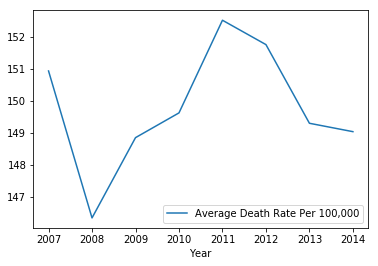

In [122]:
cod_cancer.plot.line('Year','Average Death Rate Per 100,000')
plt.show()

In [123]:
cod_assault = cod.loc[cod['Leading Cause'].str.contains('Assault'),:]
cod_assault = cod_assault.sort_values(by='Year',ascending=True)
cod_assault

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,"Death Rate Per 100,000"
600,2007,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,267.0,31.3
738,2007,"Assault (Homicide: Y87.1, X85-Y09)",M,Hispanic,114.0,10.5
788,2008,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,286.0,33.7
559,2009,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,255.0,30.0
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299.0,35.1
507,2011,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,266.0,31.2
197,2012,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,235.0,27.5
166,2013,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,174.0,20.3
195,2014,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,186.0,21.5


In [124]:
cod_assault = cod_assault.rename(columns={'Deaths':'Total Deaths', 'Death Rate Per 100,000':'Average Death Rate Per 100,000'})

In [126]:
cod_assault = cod_assault.groupby('Year', as_index=False).agg({'Total Deaths':np.sum,'Average Death Rate Per 100,000':np.mean})
cod_assault

,Year,Total Deaths,"Average Death Rate Per 100,000"
0,2007,381.0,20.9
1,2008,286.0,33.7
2,2009,255.0,30.0
3,2010,299.0,35.1
4,2011,266.0,31.2
5,2012,235.0,27.5
6,2013,174.0,20.3
7,2014,186.0,21.5


In [105]:
cod.loc[cod['Leading Cause'].str.contains('Assault'),:].mean()

Year                      2010.111111
Deaths                     231.333333
Death Rate Per 100,000      26.788889
dtype: float64

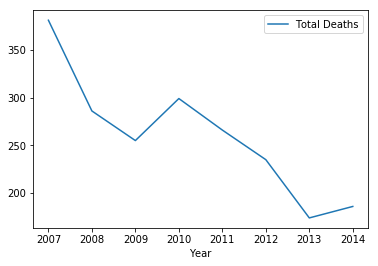

In [103]:
fig,ax = plt.subplots()

cod_assault['Total Deaths'].plot(kind='line', figsize=[7,7], color='red')
ax.set_xlabel('Year', fontsize = 10)
ax.set_ylabel('Number of deaths', fontsize=10)
ax.set_title('Total Assault Deaths in NYC Per Year', fontsize=15, fontweight='bold')

line_locator = 2007
message = 'In 2007...initiative to reduce homicides in the city was enacted etc.'

ax.vlines(line_locator,-1,400, linestyle="--",color="black")

ax.text(line_locator + 0.1,
       400,
       message,
       horizontalalignment='left',fontsize=10)
plt.show()

fig, ax = subplots
cod_assault.plot.line('Year','Total Deaths')
plt.show()


In [86]:
cod_heartdisease = cod.loc[cod['Leading Cause'].str.contains('Diseases of Heart'),:]

In [87]:
cod_heartdisease = cod_heartdisease.rename(columns={'Deaths':'Total Deaths', 'Death Rate Per 100,000':'Average Death Rate Per 100,000'})

In [88]:
cod_heartdisease = cod_heartdisease.groupby('Year', as_index = False).agg({'Total Deaths':np.sum,'Average Death Rate Per 100,000':np.mean})
cod_heartdisease

,Year,Total Deaths,"Average Death Rate Per 100,000"
0,2007,21194.0,231.0875
1,2008,20918.0,228.5875
2,2009,19801.0,216.7500
3,2010,17685.0,194.0250
4,2011,16722.0,183.8375
5,2012,16469.0,181.4500
6,2013,16389.0,180.8625
7,2014,16176.0,178.2125


In [106]:
cod.loc[cod['Leading Cause'].str.contains('Diseases of Heart'),:].mean()

Year                      2010.500000
Deaths                    2271.156250
Death Rate Per 100,000     199.351563
dtype: float64

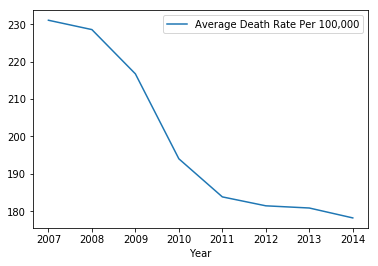

In [127]:
cod_heartdisease.plot.line('Year','Average Death Rate Per 100,000')
plt.show()

In [128]:
# Cancer death rates have not changed much
# Assaults per year have gone down from 381 total deaths to 186, equating to a (381-186)/381 = 51.18% decrease in assault deaths from 2007 to 2014
# Death rates from heart disease have also gone down from 231 to 178, equating to a (231-178)/231 = 22.94% decrease in deaths from heart-disease from 2007 to 2014